##**IBM EMPLOYEE ATTRITION**
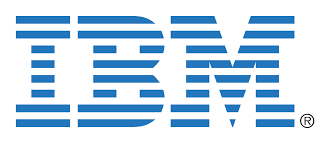


##OVERVIEW

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.

Some forms of attrition are unavoidable, like if an employee is retiring or is moving to another city. But after a certain threshold, attrition can make a big dent in your company’s bottom line as well as its culture.

For example, attrition among minority employee groups could be hurting diversity at your organization. Or, attrition among senior leaders can lead to a significant gap in organizational leadership.
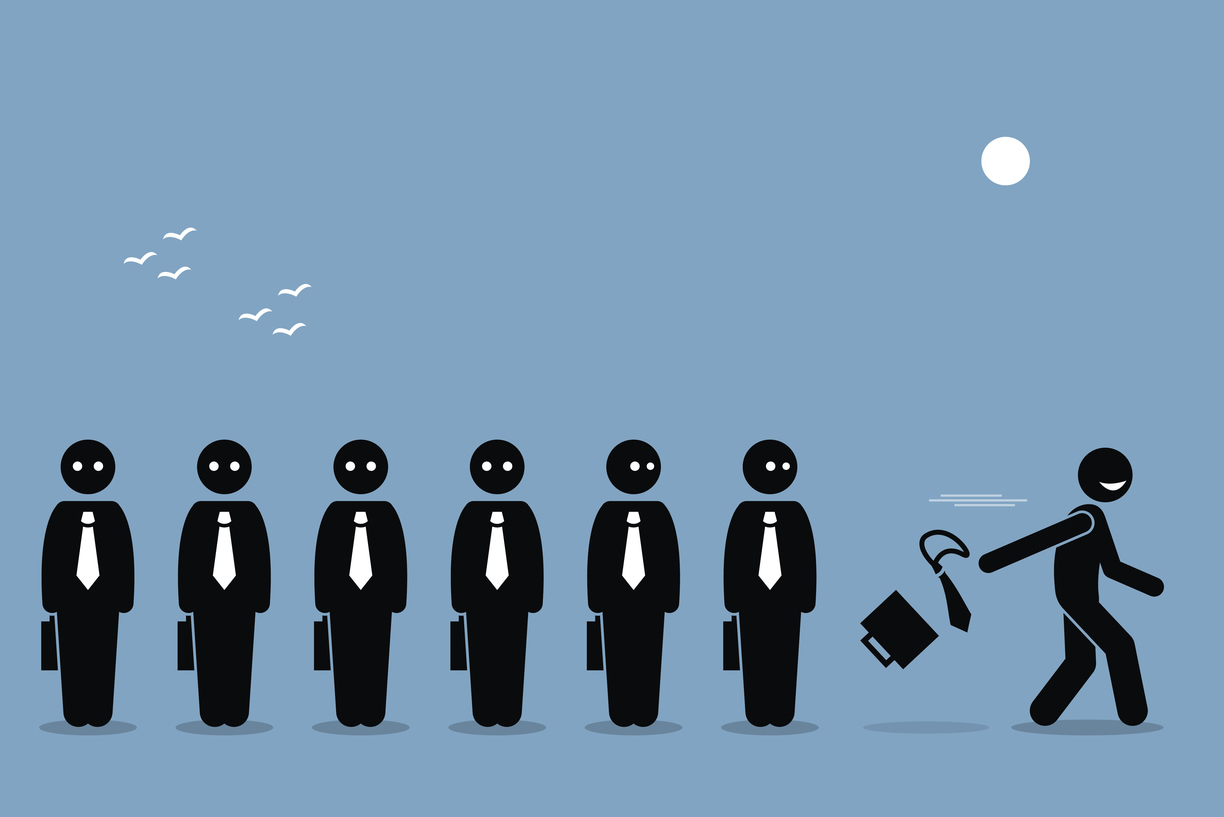

#Introduction#
In this project, we will work with the dataset from IBM employee attribution and using the [attr_data.db](https://sqliteviewer.flowsoft7.com/?state=%7B%22ids%22:%5B%221WnngYjkDzYo5A3cbyPODRHXarjFMvyqp%22%5D,%22action%22:%22open%22,%22userId%22:%22106485332383922392782%22,%22resourceKeys%22:%7B%7D%7D) and the [data dictionary](https://drive.google.com/file/d/1UoxqECJQ4Lxj3CubC1lG_GSnSga_z_IN/view?usp=share_link), extract all the data from the only table in the database using SQL. Once the data is extracted, we would import the data into Pandas and continue with the analysis. 

The following questions hope to be answered:
* *What are the 3 factors behind employee attrition?*
* *What is the relationship between Education and Monthly Income?*
* *What is the effect of age on attrition?*
* *Is Income the main factor in employee attrition?*
* *How does work-life balance impact the overall attrition rate?*

In [1]:
#Import neccessary libaries and built in modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
import sqlite3
import json
import typing as tp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%load_ext sql

In [2]:
#Create a SQL connection to our SQLite database
conn = sqlite3.connect("attr_data.db")
cur = conn.cursor()

conn.commit()

In [3]:
sql = pd.read_sql_query("SELECT * FROM attrition_records", conn)


In [4]:
#reading the sql database directly into pandas
df = pd.DataFrame(sql)
#converting the table from the database to a .csv file
df.to_csv('attr_data.csv')

In [5]:
# saving the dataframe
df.to_csv(r'C://DESKTOP-F8FEO8R/Users/USER/Downloads\attr_data.csv')

df = pd.read_csv('attr_data.csv', index_col=False)

In [ ]:
df.shape

(1470, 37)

In [ ]:
df.head()

,Unnamed: 0,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5
1,1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10,7,1,7
2,2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,...,2,80,0,7,3,3,0,0,0,0
3,3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8,7,3,0
4,4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#to drop the first column in the table 
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# setting id as index and deleting it as a column
df.set_index("id", drop=True, inplace=True)

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#to check for duplicates in the dataframe
df.duplicated()

id
1       False
2       False
3       False
4       False
5       False
        ...  
1466    False
1467    False
1468    False
1469    False
1470    False
Length: 1470, dtype: bool

In [ ]:
#to check for null values
df.isnull().any().any()

False

In [ ]:
#to check for null values
df.isna().any().any()

False

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#What are the likely 3 factors behind employee attrition?#



In [ ]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#to determine variable type and count
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
Atrr = df.Attrition.value_counts()

In [ ]:
Gender = df.Gender.unique()

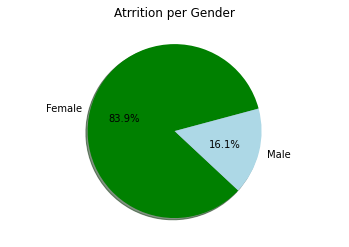

In [ ]:
#plotting different charts to see correlation and relationship between attrition and other factors
my_colors=['green', 'lightblue']
plt.axis('equal')
plt.pie(Atrr, labels=Gender, autopct='%.1f%%', startangle=15, shadow=True, colors=my_colors)
plt.title('Atrrition per Gender')
plt.show();

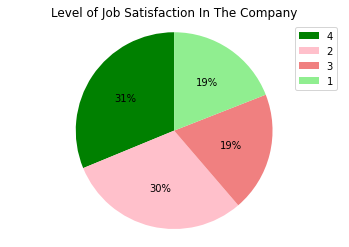

In [ ]:
#Kindly refer to the data dictionary in the overview above to see the satisfaction rating
y = df.JobSatisfaction.value_counts()
mycolors='green','pink','lightcoral','lightgreen'
plt.pie(y, startangle = 90, autopct='%d%%', shadow=False, colors=mycolors)
plt.axis('equal')
plt.legend((df.JobSatisfaction.unique()), loc='best')
plt.title('Level of Job Satisfaction In The Company')
plt.show() 

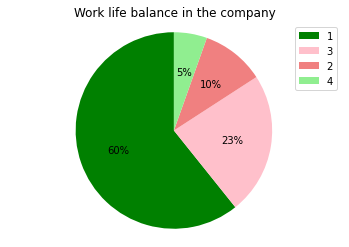

In [ ]:
#Kindly refer to the data dictionary in the overview above to see the satisfaction rating
y = df.WorkLifeBalance.value_counts()
mycolors='green','pink','lightcoral','lightgreen'
plt.pie(y, startangle = 90, autopct='%d%%', shadow=False, colors=mycolors)
plt.legend(df.WorkLifeBalance.unique(), loc='best')
plt.axis('equal')
plt.title('Work life balance in the company')
plt.show() 

[Text(0.5, 1.0, 'Years in current role against years since last promotion')]

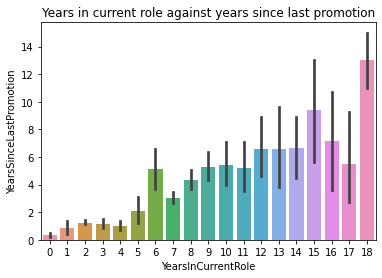

In [ ]:
#Bar chart representing Years in current role against years since last promotion
sns.barplot(
    data=df,
    x='YearsInCurrentRole',
    y='YearsSinceLastPromotion'
    ).set(title='Years in current role against years since last promotion')

[Text(0.5, 1.0, 'Department against WorkLifeBalance')]

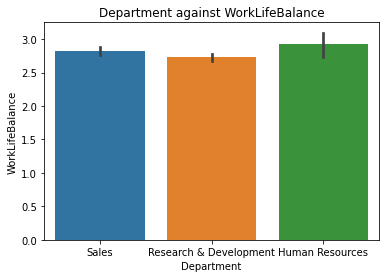

In [ ]:
#Bar chart representing Department angainst JobSatistfaction
sns.barplot(
    data=df,
    x='Department',
    y='WorkLifeBalance',
    ).set(title='Department against WorkLifeBalance')

[Text(0.5, 1.0, 'Attrition against JobSatistfaction')]

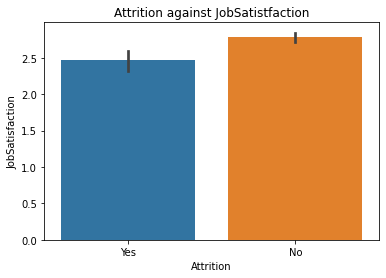

In [ ]:
#Bar chart representing Attrition against JobSatistfaction
sns.barplot(
    data=df,
    x='Attrition',
    y='JobSatisfaction',
).set(title='Attrition against JobSatistfaction')

#**What is the relationship between Education and Monthly Income?**


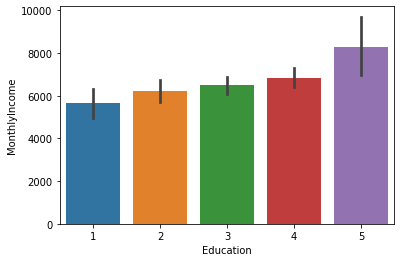

In [ ]:
# Relationship between Education and Monthly income
# Option1
sns.barplot(
    data=df,
    x='Education',
    y='MonthlyIncome'
)

Text(0.5, 1.0, 'Plot of Education against Monthly Income')

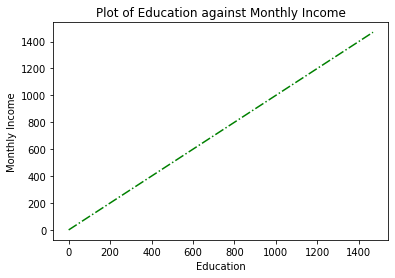

In [ ]:
#Relationship between Education and Monthly Income
# Option2
plt.plot(range(len(df["Education"])), range(len(df["MonthlyIncome"])), 'g-.')
plt.xlabel("Education")
plt.ylabel("Monthly Income")
plt.title("Plot of Education against Monthly Income")

#**What is the effect of age on attrition?**

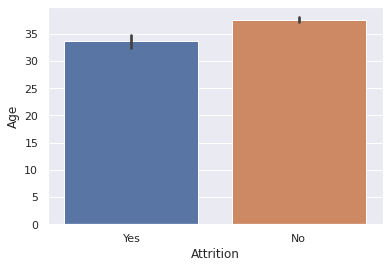

In [ ]:
# Effect of age on attrition
sns.barplot(
    data=df,
    y='Age',
    x='Attrition'
)

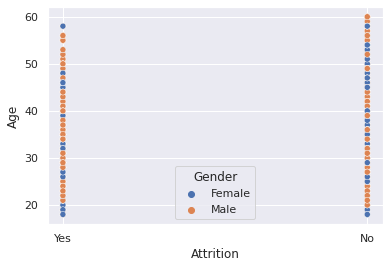

In [ ]:
# Effect of age on attrition
sns.set(style='darkgrid')
sns.scatterplot(y="Age",
                    x="Attrition",
                    hue="Gender",
                    data= df)

#**Is Income the main factor in employee attrition?**

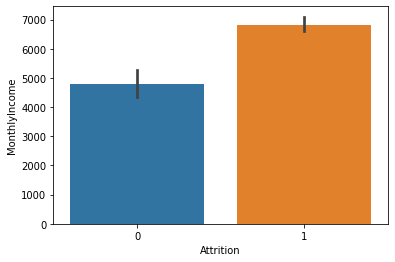

In [ ]:
# Is income the main factor in employee attrition?
sns.barplot(
    data=df,
    x='Attrition',
    y='MonthlyIncome'
)

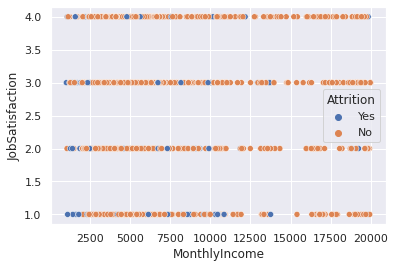

In [ ]:
sns.set(style='darkgrid')
 
sns.scatterplot(data= df, x='MonthlyIncome', y='JobSatisfaction', hue='Attrition')

#**How does work-life balance impact the overall attrition rate?**

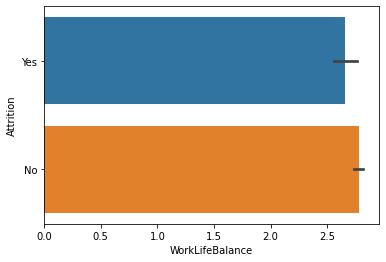

In [ ]:
# #How does Work-life balance impact the overall attrition rate?
#option1
sns.barplot(
    data=df,
    x='WorkLifeBalance',
    y='Attrition'
)

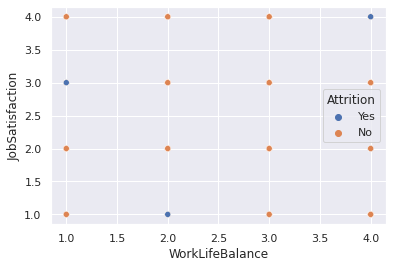

In [ ]:
#option2
sns.set(style='darkgrid')
 
sns.scatterplot(x="WorkLifeBalance",
                    y="JobSatisfaction",
                    hue="Attrition",
                    data= df)

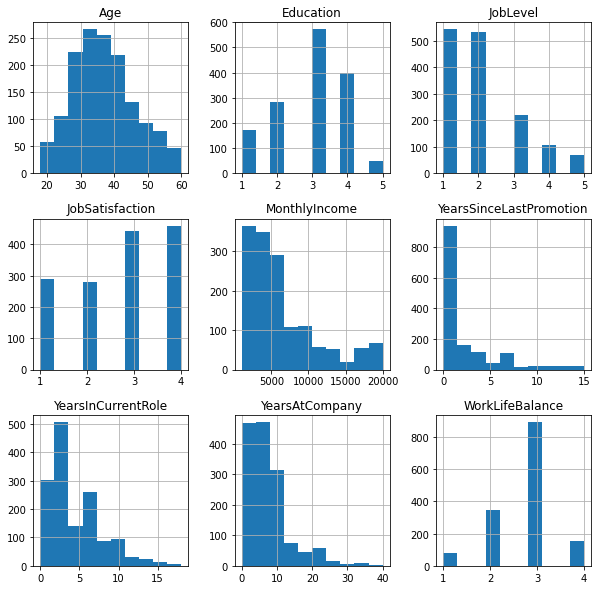

In [8]:
#histogram
features = ['Age', 'Education', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsAtCompany', 'WorkLifeBalance'] 
df[features].hist(figsize=(10,10));

In [ ]:
df[features].plot(kind='bar', subplots=True, layout=(10, 10), sharex=False, figsize=(5, 5));

In [ ]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


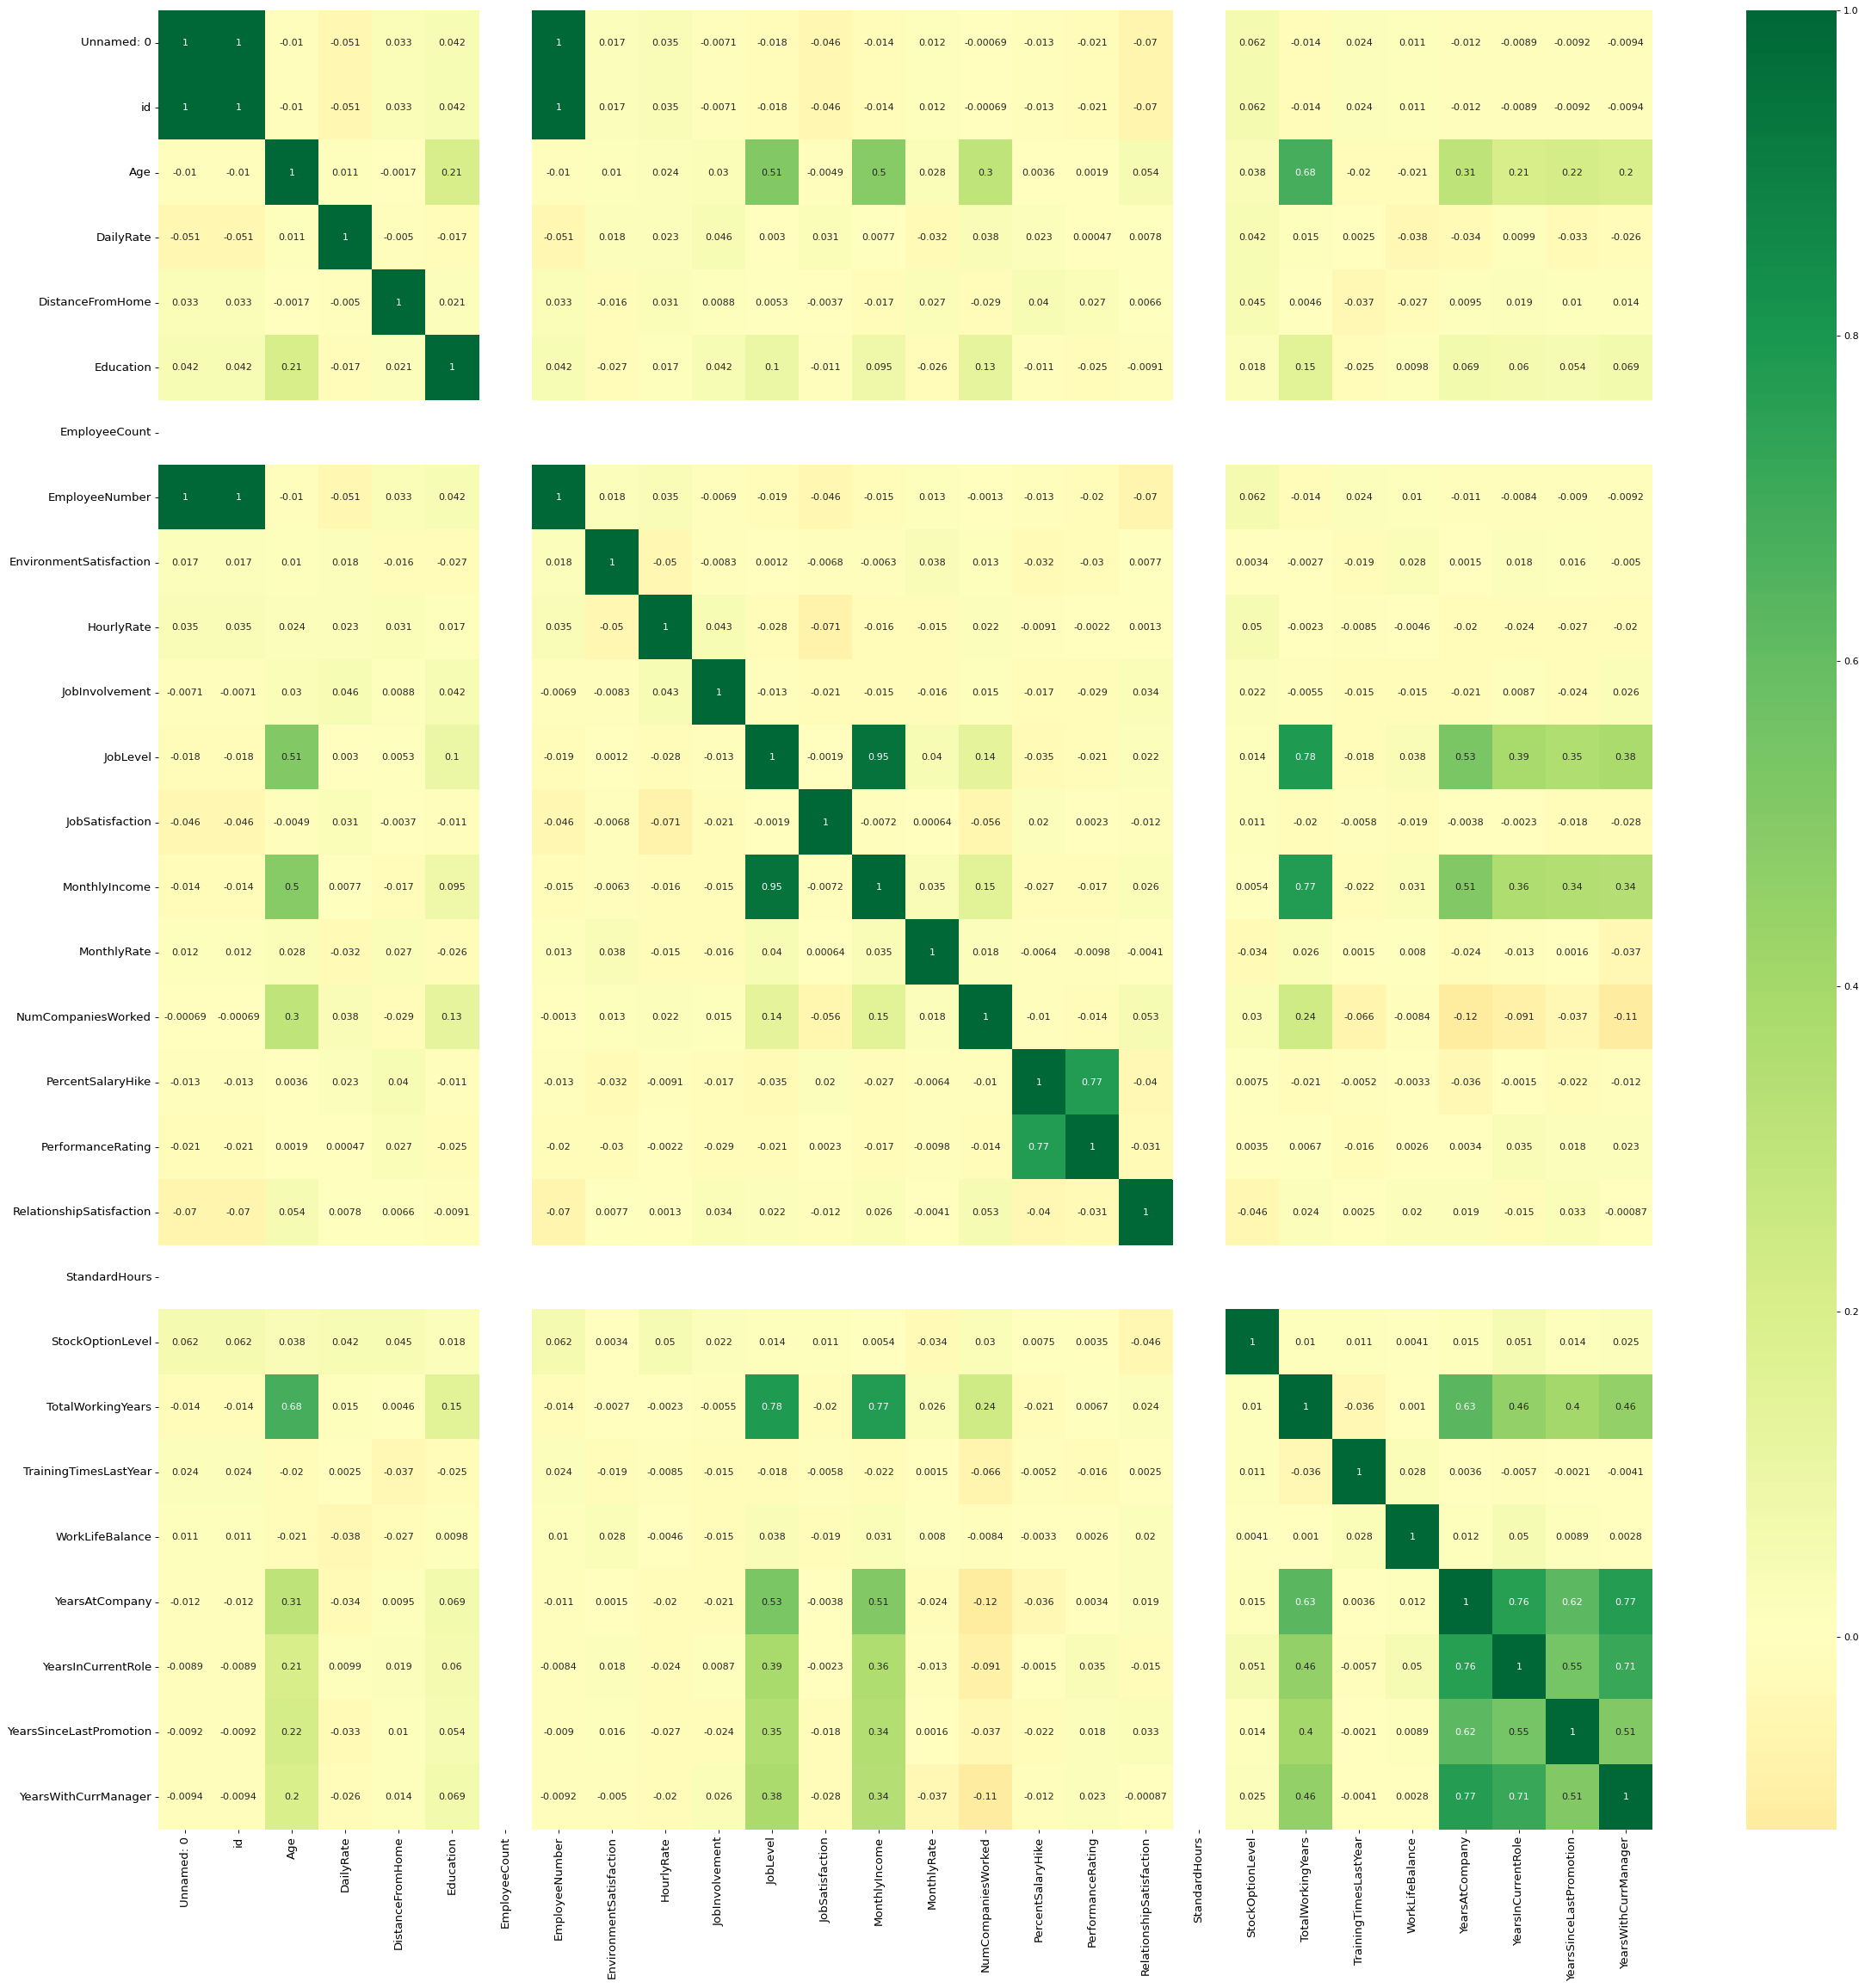

In [12]:
#heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Plot
plt.figure(figsize=(35,35), dpi= 80)
heatmap = sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
heatmap.set_title('Correlation Heatmap', fontsize=15, pad=12);